In [1]:
import numpy as np 
import mlrose_hiive
import matplotlib.pyplot as plt
import time
from random import randint
import warnings

# Flip flop

SA: 0.00599980354309082 5
RHC: 0.0010004043579101562 5
GA: 0.2159867286682129 5
MIMIC: 0.10167312622070312 5
SA: 0.009649276733398438 25
RHC: 0.0012047290802001953 25
GA: 0.40622615814208984 25
MIMIC: 0.28107190132141113 25
SA: 0.009714841842651367 45
RHC: 0.000997781753540039 45
GA: 1.1043062210083008 45
MIMIC: 0.6237258911132812 45
SA: 0.015625953674316406 65
RHC: 0.0 65
GA: 0.19183063507080078 65
MIMIC: 0.8995709419250488 65
SA: 0.03449082374572754 85
RHC: 0.0029976367950439453 85
GA: 1.4396424293518066 85
MIMIC: 2.195615530014038 85
SA: 0.04429292678833008 105
RHC: 0.0 105
GA: 0.6990702152252197 105
MIMIC: 3.281954050064087 105
SA: 0.015635013580322266 125
RHC: 0.0 125
GA: 1.0557963848114014 125
MIMIC: 3.5512614250183105 125
SA: 0.01617431640625 145
RHC: 0.014673948287963867 145
GA: 0.4460608959197998 145
MIMIC: 4.314707517623901 145
SA: 0.031235933303833008 165
RHC: 0.0 165
GA: 0.6841342449188232 165
MIMIC: 4.384242296218872 165
SA: 0.029873371124267578 185
RHC: 0.0 185
GA: 2.2354

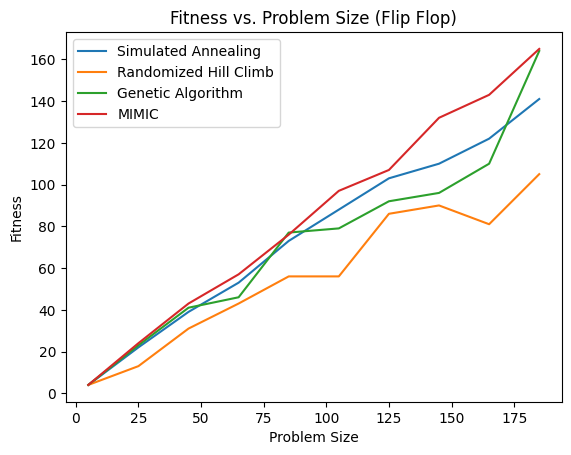

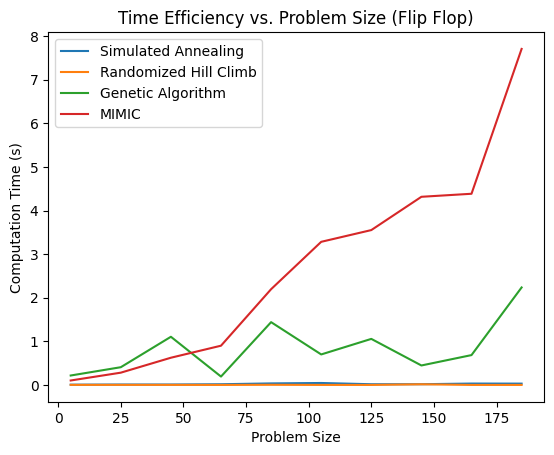

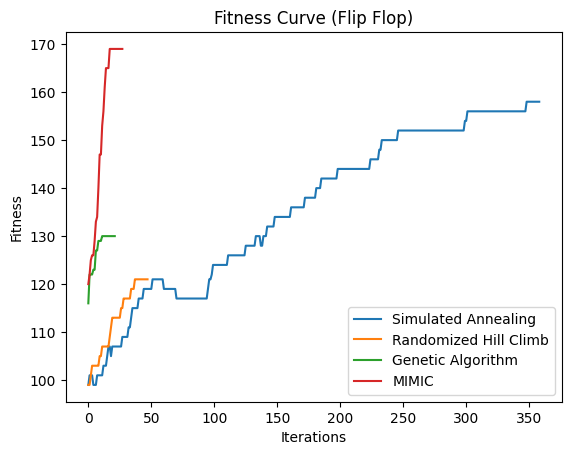

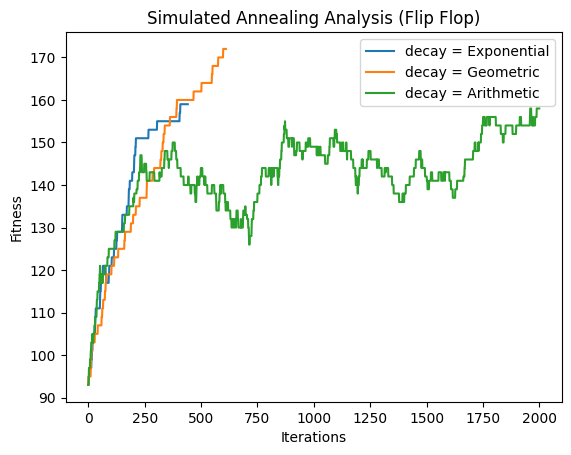

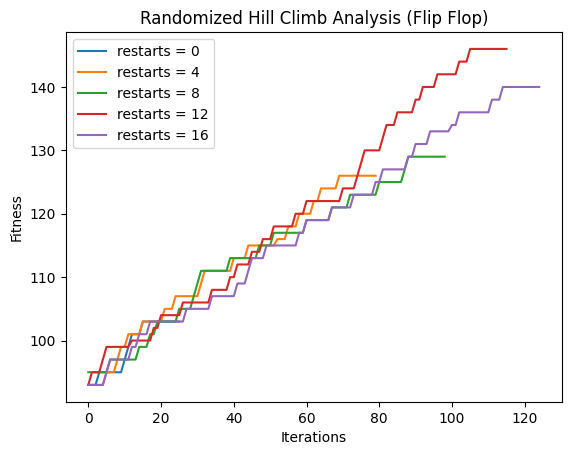

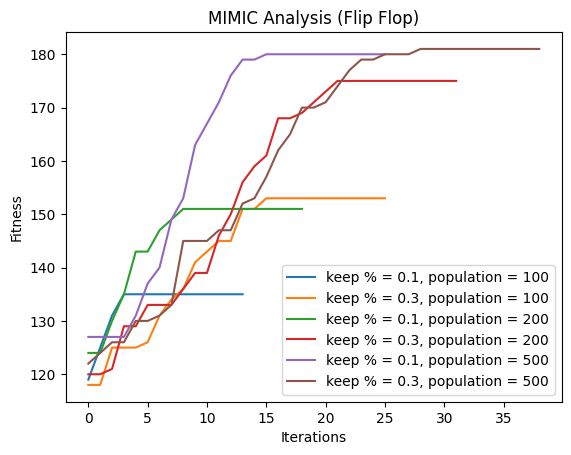

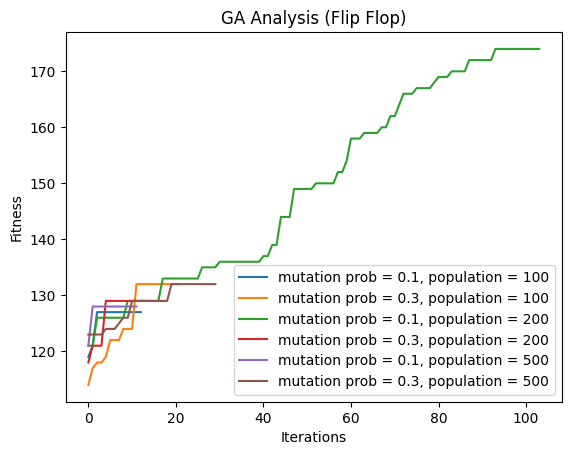

In [2]:
np.random.seed(42)

fitness_simulated_annealing = []
fitness_random_hill_climb = []
fitness_genetic_algorithm = []
fitness_mimic = []

time_simulated_annealing = []
time_random_hill_climb = []
time_genetic_algorithm = []
time_mimic = []

## Plot effect of increasing problem size

range_values = range(5,200,20)

for value in range_values:
	fitness = mlrose_hiive.FlipFlop()
	problem = mlrose_hiive.DiscreteOpt(length = value, fitness_fn = fitness, maximize = True, max_val = 2)
	problem.set_mimic_fast_mode(True)
	init_state = np.random.randint(2, size = value)
	start = time.time()
	_, best_fitness_sa, _ = mlrose_hiive.simulated_annealing(problem, schedule = mlrose_hiive.ExpDecay(), max_attempts = 10, max_iters = 2000, init_state = init_state, curve = True)
	end = time.time()
	sa_time = end - start
	print("SA:", sa_time, value)

	start = time.time()
	_, best_fitness_rhc, _ = mlrose_hiive.random_hill_climb(problem, max_attempts = 10, max_iters = 2000, init_state = init_state, curve = True)
	end = time.time()
	rhc_time = end - start
	print("RHC:", rhc_time, value)

	start = time.time()
	_, best_fitness_ga, _ = mlrose_hiive.genetic_alg(problem, max_attempts = 10, curve = True) ##
	end = time.time()
	ga_time = end - start
	print("GA:", ga_time, value)

	start = time.time()
	_, best_fitness_mimic, _ = mlrose_hiive.mimic(problem, pop_size = 300, max_attempts = 10, curve = True)
	end = time.time()
	mimic_time = end - start
	print("MIMIC:", mimic_time, value)

	fitness_simulated_annealing.append(best_fitness_sa)
	fitness_random_hill_climb.append(best_fitness_rhc)
	fitness_genetic_algorithm.append(best_fitness_ga)
	fitness_mimic.append(best_fitness_mimic)

	time_simulated_annealing.append(sa_time)
	time_random_hill_climb.append(rhc_time)
	time_genetic_algorithm.append(ga_time)
	time_mimic.append(mimic_time)

fitness_simulated_annealing = np.array(fitness_simulated_annealing)
fitness_random_hill_climb = np.array(fitness_random_hill_climb)
fitness_genetic_algorithm = np.array(fitness_genetic_algorithm)
fitness_mimic = np.array(fitness_mimic)

time_simulated_annealing = np.array(time_simulated_annealing)
time_random_hill_climb = np.array(time_random_hill_climb)
time_genetic_algorithm = np.array(time_genetic_algorithm)
time_mimic = np.array(time_mimic)

plt.figure()
plt.plot(range_values, fitness_simulated_annealing, label = 'Simulated Annealing')
plt.plot(range_values, fitness_random_hill_climb, label = 'Randomized Hill Climb')
plt.plot(range_values, fitness_genetic_algorithm, label = 'Genetic Algorithm')
plt.plot(range_values, fitness_mimic, label = 'MIMIC')
plt.title('Fitness vs. Problem Size (Flip Flop)')
plt.xlabel('Problem Size')
plt.ylabel('Fitness')
plt.legend()
plt.savefig('flip_flop_fitness.png')

plt.figure()
plt.plot(range_values, time_simulated_annealing, label = 'Simulated Annealing')
plt.plot(range_values, time_random_hill_climb, label = 'Randomized Hill Climb')
plt.plot(range_values, time_genetic_algorithm, label = 'Genetic Algorithm')
plt.plot(range_values, time_mimic, label = 'MIMIC')
plt.title('Time Efficiency vs. Problem Size (Flip Flop)')
plt.legend()
plt.xlabel('Problem Size')
plt.ylabel('Computation Time (s)')
plt.savefig('flip_flop_computation.png')

## Plot change with respect to iterations

problem_length = 200
fitness = mlrose_hiive.FlipFlop()
problem = mlrose_hiive.DiscreteOpt(length = problem_length, fitness_fn = fitness, maximize = True, max_val = 2)
problem.set_mimic_fast_mode(True)
init_state = np.random.randint(2, size = problem_length)
_, _, fitness_curve_sa = mlrose_hiive.simulated_annealing(problem, schedule = mlrose_hiive.ExpDecay(), max_attempts = 10, max_iters = 2000, init_state = init_state, curve = True)
print("Done with SA iterations!")
_, _, fitness_curve_rhc = mlrose_hiive.random_hill_climb(problem, max_attempts = 10, max_iters = 2000, init_state = init_state, curve = True)
print("Done with RHC iterations!")
_, _, fitness_curve_ga = mlrose_hiive.genetic_alg(problem, max_attempts = 10, curve = True)
print("Done with GA iterations!")
_, _, fitness_curve_mimic = mlrose_hiive.mimic(problem, pop_size = 300, max_attempts = 10, curve = True)
print("Done with MIMIC iterations!")

plt.figure()
plt.plot(fitness_curve_sa[:,0], label = 'Simulated Annealing')
plt.plot(fitness_curve_rhc[:,0], label = 'Randomized Hill Climb')
plt.plot(fitness_curve_ga[:,0], label = 'Genetic Algorithm')
plt.plot(fitness_curve_mimic[:,0], label = 'MIMIC')
plt.title('Fitness Curve (Flip Flop)')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.savefig('flip_flop_iterations.png')

## Plot variation in performance with changing hyper-parameters

problem_length = 200
fitness = mlrose_hiive.FlipFlop()
problem = mlrose_hiive.DiscreteOpt(length = problem_length, fitness_fn = fitness, maximize = True, max_val = 2)
problem.set_mimic_fast_mode(True)
init_state = np.random.randint(2, size = problem_length)

_, _, fitness_curve_sa_1 = mlrose_hiive.simulated_annealing(problem, schedule = mlrose_hiive.ExpDecay(), max_attempts = 10, max_iters = 2000, init_state = init_state, curve = True)
_, _, fitness_curve_sa_2 = mlrose_hiive.simulated_annealing(problem, schedule = mlrose_hiive.GeomDecay(), max_attempts = 10, max_iters = 2000, init_state = init_state, curve = True)
_, _, fitness_curve_sa_3 = mlrose_hiive.simulated_annealing(problem, schedule = mlrose_hiive.ArithDecay(), max_attempts = 10, max_iters = 2000, init_state = init_state, curve = True)
print("Completed SA hyper-parameter testing!")

plt.figure()
plt.plot(fitness_curve_sa_1[:,0], label = 'decay = Exponential')
plt.plot(fitness_curve_sa_2[:,0], label = 'decay = Geometric')
plt.plot(fitness_curve_sa_3[:,0], label = 'decay = Arithmetic')
plt.title('Simulated Annealing Analysis (Flip Flop)')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.savefig('flip_flop_sa.png')

_, _, fitness_curve_rhc_1 = mlrose_hiive.random_hill_climb(problem, restarts = 0, max_attempts = 10, max_iters = 2000, init_state = init_state, curve = True)
_, _, fitness_curve_rhc_2 = mlrose_hiive.random_hill_climb(problem, restarts = 4, max_attempts = 10, max_iters = 2000, init_state = init_state, curve = True)
_, _, fitness_curve_rhc_3 = mlrose_hiive.random_hill_climb(problem, restarts = 8, max_attempts = 10, max_iters = 2000, init_state = init_state, curve = True)
_, _, fitness_curve_rhc_4 = mlrose_hiive.random_hill_climb(problem, restarts = 12, max_attempts = 10, max_iters = 2000, init_state = init_state, curve = True)
_, _, fitness_curve_rhc_5 = mlrose_hiive.random_hill_climb(problem, restarts = 16, max_attempts = 10, max_iters = 2000, init_state = init_state, curve = True)
print("Completed RHC hyper-parameter testing!")

plt.figure()
plt.plot(fitness_curve_rhc_1[:,0], label = 'restarts = 0')
plt.plot(fitness_curve_rhc_2[:,0], label = 'restarts = 4')
plt.plot(fitness_curve_rhc_3[:,0], label = 'restarts = 8')
plt.plot(fitness_curve_rhc_4[:,0], label = 'restarts = 12')
plt.plot(fitness_curve_rhc_5[:,0], label = 'restarts = 16')
plt.title('Randomized Hill Climb Analysis (Flip Flop)')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.savefig('flip_flop_rhc.png')

_, _, fitness_curve_mimic_1 = mlrose_hiive.mimic(problem, keep_pct = 0.1, pop_size = 100, max_attempts = 10, curve = True)
_, _, fitness_curve_mimic_2 = mlrose_hiive.mimic(problem, keep_pct = 0.3, pop_size = 100, max_attempts = 10, curve = True)
_, _, fitness_curve_mimic_3 = mlrose_hiive.mimic(problem, keep_pct = 0.1, pop_size = 200, max_attempts = 10, curve = True)
_, _, fitness_curve_mimic_4 = mlrose_hiive.mimic(problem, keep_pct = 0.3, pop_size = 200, max_attempts = 10, curve = True)
_, _, fitness_curve_mimic_5 = mlrose_hiive.mimic(problem, keep_pct = 0.1, pop_size = 500, max_attempts = 10, curve = True)
_, _, fitness_curve_mimic_6 = mlrose_hiive.mimic(problem, keep_pct = 0.3, pop_size = 500, max_attempts = 10, curve = True)
print("Completed MIMIC hyper-parameter testing!")

plt.figure()
plt.plot(fitness_curve_mimic_1[:,0], label = 'keep % = 0.1, population = 100')
plt.plot(fitness_curve_mimic_2[:,0], label = 'keep % = 0.3, population = 100')
plt.plot(fitness_curve_mimic_3[:,0], label = 'keep % = 0.1, population = 200')
plt.plot(fitness_curve_mimic_4[:,0], label = 'keep % = 0.3, population = 200')
plt.plot(fitness_curve_mimic_5[:,0], label = 'keep % = 0.1, population = 500')
plt.plot(fitness_curve_mimic_6[:,0], label = 'keep % = 0.3, population = 500')
plt.title('MIMIC Analysis (Flip Flop)')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.savefig('flip_flop_mimic.png')

_, _, fitness_curve_ga_1 = mlrose_hiive.genetic_alg(problem, mutation_prob = 0.1, pop_size = 100, max_attempts = 10, curve = True)
_, _, fitness_curve_ga_2 = mlrose_hiive.genetic_alg(problem, mutation_prob = 0.3, pop_size = 100, max_attempts = 10, curve = True)
_, _, fitness_curve_ga_3 = mlrose_hiive.genetic_alg(problem, mutation_prob = 0.1, pop_size = 200, max_attempts = 10, curve = True)
_, _, fitness_curve_ga_4 = mlrose_hiive.genetic_alg(problem, mutation_prob = 0.3, pop_size = 200, max_attempts = 10, curve = True)
_, _, fitness_curve_ga_5 = mlrose_hiive.genetic_alg(problem, mutation_prob = 0.1, pop_size = 500, max_attempts = 10, curve = True)
_, _, fitness_curve_ga_6 = mlrose_hiive.genetic_alg(problem, mutation_prob = 0.3, pop_size = 500, max_attempts = 10, curve = True)
print("Completed GA hyper-parameter testing!")

plt.figure()
plt.plot(fitness_curve_ga_1[:,0], label = 'mutation prob = 0.1, population = 100')
plt.plot(fitness_curve_ga_2[:,0], label = 'mutation prob = 0.3, population = 100')
plt.plot(fitness_curve_ga_3[:,0], label = 'mutation prob = 0.1, population = 200')
plt.plot(fitness_curve_ga_4[:,0], label = 'mutation prob = 0.3, population = 200')
plt.plot(fitness_curve_ga_5[:,0], label = 'mutation prob = 0.1, population = 500')
plt.plot(fitness_curve_ga_6[:,0], label = 'mutation prob = 0.3, population = 500')
plt.title('GA Analysis (Flip Flop)')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.savefig('flip_flop_ga.png')

# Continous Peaks

In [ ]:
np.random.seed(42)

fitness_simulated_annealing = []
fitness_random_hill_climb = []
fitness_genetic_algorithm = []
fitness_mimic = []

time_simulated_annealing = []
time_random_hill_climb = []
time_genetic_algorithm = []
time_mimic = []

## Plot effect of increasing problem size

range_values = range(10,200,20)

for value in range_values:
	fitness = mlrose_hiive.ContinuousPeaks(t_pct = 0.1)
	problem = mlrose_hiive.DiscreteOpt(length = value, fitness_fn = fitness, maximize = True, max_val = 2)
	problem.set_mimic_fast_mode(True)
	init_state = np.random.randint(2, size = value)
	start = time.time()
	_, best_fitness_sa, _ = mlrose_hiive.simulated_annealing(problem, schedule = mlrose_hiive.ExpDecay(), max_attempts = 1000, max_iters = 100000, init_state = init_state, curve = True)
	end = time.time()
	sa_time = end - start
	print("SA:", sa_time, value)

	start = time.time()
	_, best_fitness_rhc, _ = mlrose_hiive.random_hill_climb(problem, max_attempts = 1000, max_iters = 10000, init_state = init_state, curve = True)
	end = time.time()
	rhc_time = end - start
	print("RHC:", rhc_time, value)

	start = time.time()
	_, best_fitness_ga, _ = mlrose_hiive.genetic_alg(problem, max_attempts = 1000, max_iters = 10000, curve = True)
	end = time.time()
	ga_time = end - start
	print("GA:", ga_time, value)

	start = time.time()
	_, best_fitness_mimic, _ = mlrose_hiive.mimic(problem, pop_size = 500, max_attempts = 100, max_iters = 10000, curve = True)
	end = time.time()
	mimic_time = end - start
	print("MIMIC:", mimic_time, value)

	fitness_simulated_annealing.append(best_fitness_sa)
	fitness_random_hill_climb.append(best_fitness_rhc)
	fitness_genetic_algorithm.append(best_fitness_ga)
	fitness_mimic.append(best_fitness_mimic)

	time_simulated_annealing.append(sa_time)
	time_random_hill_climb.append(rhc_time)
	time_genetic_algorithm.append(ga_time)
	time_mimic.append(mimic_time)

fitness_simulated_annealing = np.array(fitness_simulated_annealing)
fitness_random_hill_climb = np.array(fitness_random_hill_climb)
fitness_genetic_algorithm = np.array(fitness_genetic_algorithm)
fitness_mimic = np.array(fitness_mimic)

time_simulated_annealing = np.array(time_simulated_annealing)
time_random_hill_climb = np.array(time_random_hill_climb)
time_genetic_algorithm = np.array(time_genetic_algorithm)
time_mimic = np.array(time_mimic)

plt.figure()
plt.plot(range_values, fitness_simulated_annealing, label = 'Simulated Annealing')
plt.plot(range_values, fitness_random_hill_climb, label = 'Randomized Hill Climb')
plt.plot(range_values, fitness_genetic_algorithm, label = 'Genetic Algorithm')
plt.plot(range_values, fitness_mimic, label = 'MIMIC')
plt.title('Fitness vs. Problem Size (Continuous Peaks)')
plt.xlabel('Problem Size')
plt.ylabel('Fitness')
plt.legend()
plt.savefig('continuous_peaks_fitness.png')

plt.figure()
plt.plot(range_values, time_simulated_annealing, label = 'Simulated Annealing')
plt.plot(range_values, time_random_hill_climb, label = 'Randomized Hill Climb')
plt.plot(range_values, time_genetic_algorithm, label = 'Genetic Algorithm')
plt.plot(range_values, time_mimic, label = 'MIMIC')
plt.title('Time Efficiency vs. Problem Size (Continuous Peaks)')
plt.legend()
plt.xlabel('Problem Size')
plt.ylabel('Computation Time (s)')
plt.savefig('continuous_peaks_computation.png')

## Plot change with respect to iterations

problem_length = 200
fitness = mlrose_hiive.ContinuousPeaks(t_pct = 0.1)
problem = mlrose_hiive.DiscreteOpt(length = problem_length, fitness_fn = fitness, maximize = True, max_val = 2)
problem.set_mimic_fast_mode(True)
init_state = np.random.randint(2, size = problem_length)
_, _, fitness_curve_sa = mlrose_hiive.simulated_annealing(problem, schedule = mlrose_hiive.ExpDecay(), max_attempts = 1000, max_iters = 100000, init_state = init_state, curve = True)
print("Done with SA iterations!")
_, _, fitness_curve_rhc = mlrose_hiive.random_hill_climb(problem, max_attempts = 1000, max_iters = 10000, init_state = init_state, curve = True)
print("Done with RHC iterations!")
_, _, fitness_curve_ga = mlrose_hiive.genetic_alg(problem, max_attempts = 1000, max_iters = 10000, curve = True)
print("Done with GA iterations!")
_, _, fitness_curve_mimic = mlrose_hiive.mimic(problem, pop_size = 500, max_attempts = 100, max_iters = 10000, curve = True)
print("Done with MIMIC iterations!")

plt.figure()
plt.plot(fitness_curve_sa[:,0], label = 'Simulated Annealing')
plt.plot(fitness_curve_rhc[:,0], label = 'Randomized Hill Climb')
plt.plot(fitness_curve_ga[:,0], label = 'Genetic Algorithm')
plt.plot(fitness_curve_mimic[:,0], label = 'MIMIC')
plt.title('Fitness Curve (Continuous Peaks)')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.savefig('continuous_peaks_iterations.png')

## Plot change with respect to different threshold values in the 4-Peaks problem

problem_length = 200
fitness = mlrose_hiive.ContinuousPeaks(t_pct = 0.1)
problem = mlrose_hiive.DiscreteOpt(length = problem_length, fitness_fn = fitness, maximize = True, max_val = 2)
problem.set_mimic_fast_mode(True)
init_state = np.random.randint(2, size = problem_length)
_, _, fitness_curve_sa_1 = mlrose_hiive.simulated_annealing(problem, schedule = mlrose_hiive.ExpDecay(), max_attempts = 1000, max_iters = 100000, init_state = init_state, curve = True)
_, _, fitness_curve_rhc_1 = mlrose_hiive.random_hill_climb(problem, max_attempts = 1000, max_iters = 10000, init_state = init_state, curve = True)
_, _, fitness_curve_ga_1 = mlrose_hiive.genetic_alg(problem, max_attempts = 1000, max_iters = 10000, curve = True)
_, _, fitness_curve_mimic_1 = mlrose_hiive.mimic(problem, pop_size = 500, max_attempts = 100, max_iters = 10000, curve = True)
print("Done with threshold 1!")

fitness = mlrose_hiive.ContinuousPeaks(t_pct = 0.3)
problem = mlrose_hiive.DiscreteOpt(length = problem_length, fitness_fn = fitness, maximize = True, max_val = 2)
problem.set_mimic_fast_mode(True)
init_state = np.random.randint(2, size = problem_length)
_, _, fitness_curve_sa_2 = mlrose_hiive.simulated_annealing(problem, schedule = mlrose_hiive.ExpDecay(), max_attempts = 1000, max_iters = 100000, init_state = init_state, curve = True)
_, _, fitness_curve_rhc_2 = mlrose_hiive.random_hill_climb(problem, max_attempts = 1000, max_iters = 10000, init_state = init_state, curve = True)
_, _, fitness_curve_ga_2 = mlrose_hiive.genetic_alg(problem, max_attempts = 1000, max_iters = 10000, curve = True)
_, _, fitness_curve_mimic_2 = mlrose_hiive.mimic(problem, pop_size = 500, max_attempts = 100, max_iters = 10000, curve = True)
print("Done with threshold 2!")

fitness = mlrose_hiive.ContinuousPeaks(t_pct = 0.5)
problem = mlrose_hiive.DiscreteOpt(length = problem_length, fitness_fn = fitness, maximize = True, max_val = 2)
problem.set_mimic_fast_mode(True)
init_state = np.random.randint(2, size = problem_length)
_, _, fitness_curve_sa_3 = mlrose_hiive.simulated_annealing(problem, schedule = mlrose_hiive.ExpDecay(), max_attempts = 1000, max_iters = 100000, init_state = init_state, curve = True)
_, _, fitness_curve_rhc_3 = mlrose_hiive.random_hill_climb(problem, max_attempts = 1000, max_iters = 10000, init_state = init_state, curve = True)
_, _, fitness_curve_ga_3 = mlrose_hiive.genetic_alg(problem, max_attempts = 1000, max_iters = 10000, curve = True)
_, _, fitness_curve_mimic_3 = mlrose_hiive.mimic(problem, pop_size = 500, max_attempts = 100, max_iters = 10000, curve = True)
print("Done with threshold 3!")

plt.figure()
plt.subplot(311)
plt.plot(fitness_curve_sa_1[:,0], label = 'SA, t = 0.1')
plt.plot(fitness_curve_rhc_1[:,0], label = 'RHC, t = 0.1')
plt.plot(fitness_curve_ga_1[:,0], label = 'GA, t = 0.1')
plt.plot(fitness_curve_mimic_1[:,0], label = 'MIMIC, t = 0.1')
plt.title('Fitness Curve for Varying Thresholds (Continuous Peaks)')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.subplot(312)
plt.plot(fitness_curve_sa_2[:,0], label = 'SA, t = 0.3')
plt.plot(fitness_curve_rhc_2[:,0], label = 'RHC, t = 0.3')
plt.plot(fitness_curve_ga_2[:,0], label = 'GA, t = 0.3')
plt.plot(fitness_curve_mimic_2[:,0], label = 'MIMIC, t = 0.3')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.subplot(313)
plt.plot(fitness_curve_sa_3[:,0], label = 'SA, t = 0.5')
plt.plot(fitness_curve_rhc_3[:,0], label = 'RHC, t = 0.5')
plt.plot(fitness_curve_ga_3[:,0], label = 'GA, t = 0.5')
plt.plot(fitness_curve_mimic_3[:,0], label = 'MIMIC, t = 0.5')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.savefig('continuous_peaks_threshold.png')

## Plot variation in performance with changing hyper-parameters

problem_length = 200
fitness = mlrose_hiive.ContinuousPeaks(t_pct = 0.1)
problem = mlrose_hiive.DiscreteOpt(length = problem_length, fitness_fn = fitness, maximize = True, max_val = 2)
problem.set_mimic_fast_mode(True)
init_state = np.random.randint(2, size = problem_length)

_, _, fitness_curve_sa_1 = mlrose_hiive.simulated_annealing(problem, schedule = mlrose_hiive.ExpDecay(), max_attempts = 1000, max_iters = 100000, init_state = init_state, curve = True)
_, _, fitness_curve_sa_2 = mlrose_hiive.simulated_annealing(problem, schedule = mlrose_hiive.GeomDecay(), max_attempts = 1000, max_iters = 100000, init_state = init_state, curve = True)
_, _, fitness_curve_sa_3 = mlrose_hiive.simulated_annealing(problem, schedule = mlrose_hiive.ArithDecay(), max_attempts = 1000, max_iters = 100000, init_state = init_state, curve = True)
print("Completed SA hyper-parameter testing!")

plt.figure()
plt.plot(fitness_curve_sa_1[:,0], label = 'decay = Exponential')
plt.plot(fitness_curve_sa_2[:,0], label = 'decay = Geometric')
plt.plot(fitness_curve_sa_3[:,0], label = 'decay = Arithmetic')
plt.title('Simulated Annealing Analysis (Continuous Peaks)')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.savefig('continuous_peaks_sa.png')

_, _, fitness_curve_rhc_1 = mlrose_hiive.random_hill_climb(problem, restarts = 0, max_attempts = 1000, max_iters = 10000, init_state = init_state, curve = True)
_, _, fitness_curve_rhc_2 = mlrose_hiive.random_hill_climb(problem, restarts = 4, max_attempts = 1000, max_iters = 10000, init_state = init_state, curve = True)
_, _, fitness_curve_rhc_3 = mlrose_hiive.random_hill_climb(problem, restarts = 8, max_attempts = 1000, max_iters = 10000, init_state = init_state, curve = True)
_, _, fitness_curve_rhc_4 = mlrose_hiive.random_hill_climb(problem, restarts = 12, max_attempts = 1000, max_iters = 10000, init_state = init_state, curve = True)
_, _, fitness_curve_rhc_5 = mlrose_hiive.random_hill_climb(problem, restarts = 16, max_attempts = 1000, max_iters = 10000, init_state = init_state, curve = True)
print("Completed RHC hyper-parameter testing!")

plt.figure()
plt.plot(fitness_curve_rhc_1[:,0], label = 'restarts = 0')
plt.plot(fitness_curve_rhc_2[:,0], label = 'restarts = 4')
plt.plot(fitness_curve_rhc_3[:,0], label = 'restarts = 8')
plt.plot(fitness_curve_rhc_4[:,0], label = 'restarts = 12')
plt.plot(fitness_curve_rhc_5[:,0], label = 'restarts = 16')
plt.title('Randomized Hill Climb Analysis (Continuous Peaks)')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.savefig('continuous_peaks_rhc.png')

_, _, fitness_curve_mimic_1 = mlrose_hiive.mimic(problem, keep_pct = 0.1, pop_size = 100, max_attempts = 100, max_iters = 10000, curve = True)
_, _, fitness_curve_mimic_2 = mlrose_hiive.mimic(problem, keep_pct = 0.3, pop_size = 100, max_attempts = 100, max_iters = 10000, curve = True)
_, _, fitness_curve_mimic_3 = mlrose_hiive.mimic(problem, keep_pct = 0.1, pop_size = 200, max_attempts = 100, max_iters = 10000, curve = True)
_, _, fitness_curve_mimic_4 = mlrose_hiive.mimic(problem, keep_pct = 0.3, pop_size = 200, max_attempts = 100, max_iters = 10000, curve = True)
_, _, fitness_curve_mimic_5 = mlrose_hiive.mimic(problem, keep_pct = 0.1, pop_size = 500, max_attempts = 100, max_iters = 10000, curve = True)
_, _, fitness_curve_mimic_6 = mlrose_hiive.mimic(problem, keep_pct = 0.3, pop_size = 500, max_attempts = 100, max_iters = 10000, curve = True)
print("Completed MIMIC hyper-parameter testing!")

plt.figure()
plt.plot(fitness_curve_mimic_1[:,0], label = 'keep % = 0.1, population = 100')
plt.plot(fitness_curve_mimic_2[:,0], label = 'keep % = 0.3, population = 100')
plt.plot(fitness_curve_mimic_3[:,0], label = 'keep % = 0.1, population = 200')
plt.plot(fitness_curve_mimic_4[:,0], label = 'keep % = 0.3, population = 200')
plt.plot(fitness_curve_mimic_5[:,0], label = 'keep % = 0.1, population = 500')
plt.plot(fitness_curve_mimic_6[:,0], label = 'keep % = 0.3, population = 500')
plt.title('MIMIC Analysis (Continuous Peaks)')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.savefig('continuous_peaks_mimic.png')

_, _, fitness_curve_ga_1 = mlrose_hiive.genetic_alg(problem, mutation_prob = 0.1, pop_size = 100, max_attempts = 1000, max_iters = 10000, curve = True)
_, _, fitness_curve_ga_2 = mlrose_hiive.genetic_alg(problem, mutation_prob = 0.3, pop_size = 100, max_attempts = 1000, max_iters = 10000, curve = True)
_, _, fitness_curve_ga_3 = mlrose_hiive.genetic_alg(problem, mutation_prob = 0.1, pop_size = 200, max_attempts = 1000, max_iters = 10000, curve = True)
_, _, fitness_curve_ga_4 = mlrose_hiive.genetic_alg(problem, mutation_prob = 0.3, pop_size = 200, max_attempts = 1000, max_iters = 10000, curve = True)
_, _, fitness_curve_ga_5 = mlrose_hiive.genetic_alg(problem, mutation_prob = 0.1, pop_size = 500, max_attempts = 1000, max_iters = 10000, curve = True)
_, _, fitness_curve_ga_6 = mlrose_hiive.genetic_alg(problem, mutation_prob = 0.3, pop_size = 500, max_attempts = 1000, max_iters = 10000, curve = True)
print("Completed GA hyper-parameter testing!")

plt.figure()
plt.plot(fitness_curve_ga_1[:,0], label = 'mutation prob = 0.1, population = 100')
plt.plot(fitness_curve_ga_2[:,0], label = 'mutation prob = 0.3, population = 100')
plt.plot(fitness_curve_ga_3[:,0], label = 'mutation prob = 0.1, population = 200')
plt.plot(fitness_curve_ga_4[:,0], label = 'mutation prob = 0.3, population = 200')
plt.plot(fitness_curve_ga_5[:,0], label = 'mutation prob = 0.1, population = 500')
plt.plot(fitness_curve_ga_6[:,0], label = 'mutation prob = 0.3, population = 500')
plt.title('GA Analysis (Continuous Peaks)')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.savefig('continuous_peaks_ga.png')

SA: 0.030019044876098633 10
RHC: 0.024977684020996094 10
GA: 15.009594202041626 10
MIMIC: 1.000002145767212 10
SA: 0.07812285423278809 30
RHC: 0.0312502384185791 30
GA: 16.719273567199707 30
MIMIC: 3.367309808731079 30
SA: 0.04683518409729004 50
RHC: 0.031245708465576172 50
GA: 23.817378520965576 50
MIMIC: 7.165592908859253 50
SA: 0.12504100799560547 70
RHC: 0.10933256149291992 70
GA: 32.80461525917053 70
MIMIC: 15.210384368896484 70
SA: 0.5083465576171875 90
RHC: 0.16547060012817383 90
GA: 50.78653120994568 90
MIMIC: 18.54912304878235 90
SA: 0.48439693450927734 110
RHC: 0.26561808586120605 110
GA: 26.36835527420044 110
MIMIC: 25.786611080169678 110
SA: 0.5049407482147217 130
RHC: 0.42807745933532715 130
GA: 113.79824924468994 130
MIMIC: 41.16694617271423 130
SA: 1.296830415725708 150
RHC: 0.6471467018127441 150
GA: 40.00007677078247 150
MIMIC: 53.067803382873535 150
SA: 1.1064627170562744 170
RHC: 0.6935608386993408 170
GA: 47.81122350692749 170


# Four peaks

In [ ]:
np.random.seed(42)

fitness_simulated_annealing = []
fitness_random_hill_climb = []
fitness_genetic_algorithm = []
fitness_mimic = []

time_simulated_annealing = []
time_random_hill_climb = []
time_genetic_algorithm = []
time_mimic = []

## Plot effect of increasing problem size

range_values = range(5,100,20)

for value in range_values:
	fitness = mlrose_hiive.FourPeaks(t_pct = 0.1)
	problem = mlrose_hiive.DiscreteOpt(length = value, fitness_fn = fitness, maximize = True, max_val = 2)
	problem.set_mimic_fast_mode(True)
	init_state = np.random.randint(2, size = value)
	start = time.time()
	_, best_fitness_sa, _ = mlrose_hiive.simulated_annealing(problem, schedule = mlrose_hiive.ExpDecay(), max_attempts = 1000, max_iters = 10000, init_state = init_state, curve = True)
	end = time.time()
	sa_time = end - start
	print("SA:", sa_time, value)

	start = time.time()
	_, best_fitness_rhc, _ = mlrose_hiive.random_hill_climb(problem, max_attempts = 1000, max_iters = 10000, init_state = init_state, curve = True)
	end = time.time()
	rhc_time = end - start
	print("RHC:", rhc_time, value)

	start = time.time()
	_, best_fitness_ga, _ = mlrose_hiive.genetic_alg(problem, max_attempts = 1000, max_iters = 10000, curve = True)
	end = time.time()
	ga_time = end - start
	print("GA:", ga_time, value)

	start = time.time()
	_, best_fitness_mimic, _ = mlrose_hiive.mimic(problem, pop_size = 500, max_attempts = 100, max_iters = 10000, curve = True)
	end = time.time()
	mimic_time = end - start
	print("MIMIC:", mimic_time, value)

	fitness_simulated_annealing.append(best_fitness_sa)
	fitness_random_hill_climb.append(best_fitness_rhc)
	fitness_genetic_algorithm.append(best_fitness_ga)
	fitness_mimic.append(best_fitness_mimic)

	time_simulated_annealing.append(sa_time)
	time_random_hill_climb.append(rhc_time)
	time_genetic_algorithm.append(ga_time)
	time_mimic.append(mimic_time)

fitness_simulated_annealing = np.array(fitness_simulated_annealing)
fitness_random_hill_climb = np.array(fitness_random_hill_climb)
fitness_genetic_algorithm = np.array(fitness_genetic_algorithm)
fitness_mimic = np.array(fitness_mimic)

time_simulated_annealing = np.array(time_simulated_annealing)
time_random_hill_climb = np.array(time_random_hill_climb)
time_genetic_algorithm = np.array(time_genetic_algorithm)
time_mimic = np.array(time_mimic)

plt.figure()
plt.plot(range_values, fitness_simulated_annealing, label = 'Simulated Annealing')
plt.plot(range_values, fitness_random_hill_climb, label = 'Randomized Hill Climb')
plt.plot(range_values, fitness_genetic_algorithm, label = 'Genetic Algorithm')
plt.plot(range_values, fitness_mimic, label = 'MIMIC')
plt.title('Fitness vs. Problem Size (Four Peaks)')
plt.xlabel('Problem Size')
plt.ylabel('Fitness')
plt.legend()
plt.savefig('four_peaks_fitness.png')

plt.figure()
plt.plot(range_values, time_simulated_annealing, label = 'Simulated Annealing')
plt.plot(range_values, time_random_hill_climb, label = 'Randomized Hill Climb')
plt.plot(range_values, time_genetic_algorithm, label = 'Genetic Algorithm')
plt.plot(range_values, time_mimic, label = 'MIMIC')
plt.title('Time Efficiency vs. Problem Size (Four Peaks)')
plt.legend()
plt.xlabel('Problem Size')
plt.ylabel('Computation Time (s)')
plt.savefig('four_peaks_computation.png')

## Plot change with respect to iterations

problem_length = 100
fitness = mlrose_hiive.FourPeaks(t_pct = 0.1)
problem = mlrose_hiive.DiscreteOpt(length = problem_length, fitness_fn = fitness, maximize = True, max_val = 2)
problem.set_mimic_fast_mode(True)
init_state = np.random.randint(2, size = problem_length)
_, _, fitness_curve_sa = mlrose_hiive.simulated_annealing(problem, schedule = mlrose_hiive.ExpDecay(), max_attempts = 1000, max_iters = 10000, init_state = init_state, curve = True)
print("Done with SA iterations!")
_, _, fitness_curve_rhc = mlrose_hiive.random_hill_climb(problem, max_attempts = 1000, max_iters = 10000, init_state = init_state, curve = True)
print("Done with RHC iterations!")
_, _, fitness_curve_ga = mlrose_hiive.genetic_alg(problem, max_attempts = 1000, max_iters = 10000, curve = True)
print("Done with GA iterations!")
_, _, fitness_curve_mimic = mlrose_hiive.mimic(problem, pop_size = 500, max_attempts = 100, max_iters = 10000, curve = True)
print("Done with MIMIC iterations!")

plt.figure()
plt.plot(fitness_curve_sa[:,0], label = 'Simulated Annealing')
plt.plot(fitness_curve_rhc[:,0], label = 'Randomized Hill Climb')
plt.plot(fitness_curve_ga[:,0], label = 'Genetic Algorithm')
plt.plot(fitness_curve_mimic[:,0], label = 'MIMIC')
plt.title('Fitness Curve (Four Peaks)')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.savefig('four_peaks_iterations.png')

## Plot change with respect to different threshold values in the 4-Peaks problem

problem_length = 45
fitness = mlrose_hiive.FourPeaks(t_pct = 0.1)
problem = mlrose_hiive.DiscreteOpt(length = problem_length, fitness_fn = fitness, maximize = True, max_val = 2)
problem.set_mimic_fast_mode(True)
init_state = np.random.randint(2, size = problem_length)
_, _, fitness_curve_sa_1 = mlrose_hiive.simulated_annealing(problem, schedule = mlrose_hiive.ExpDecay(), max_attempts = 1000, max_iters = 10000, init_state = init_state, curve = True)
_, _, fitness_curve_rhc_1 = mlrose_hiive.random_hill_climb(problem, max_attempts = 1000, max_iters = 10000, init_state = init_state, curve = True)
_, _, fitness_curve_ga_1 = mlrose_hiive.genetic_alg(problem, max_attempts = 1000, max_iters = 10000, curve = True)
_, _, fitness_curve_mimic_1 = mlrose_hiive.mimic(problem, pop_size = 500, max_attempts = 100, max_iters = 10000, curve = True)
print("Done with threshold 1!")

fitness = mlrose_hiive.FourPeaks(t_pct = 0.3)
problem = mlrose_hiive.DiscreteOpt(length = problem_length, fitness_fn = fitness, maximize = True, max_val = 2)
problem.set_mimic_fast_mode(True)
init_state = np.random.randint(2, size = problem_length)
_, _, fitness_curve_sa_2 = mlrose_hiive.simulated_annealing(problem, schedule = mlrose_hiive.ExpDecay(), max_attempts = 1000, max_iters = 10000, init_state = init_state, curve = True)
_, _, fitness_curve_rhc_2 = mlrose_hiive.random_hill_climb(problem, max_attempts = 1000, max_iters = 10000, init_state = init_state, curve = True)
_, _, fitness_curve_ga_2 = mlrose_hiive.genetic_alg(problem, max_attempts = 1000, max_iters = 10000, curve = True)
_, _, fitness_curve_mimic_2 = mlrose_hiive.mimic(problem, pop_size = 500, max_attempts = 100, max_iters = 10000, curve = True)
print("Done with threshold 2!")

fitness = mlrose_hiive.FourPeaks(t_pct = 0.5)
problem = mlrose_hiive.DiscreteOpt(length = problem_length, fitness_fn = fitness, maximize = True, max_val = 2)
problem.set_mimic_fast_mode(True)
init_state = np.random.randint(2, size = problem_length)
_, _, fitness_curve_sa_3 = mlrose_hiive.simulated_annealing(problem, schedule = mlrose_hiive.ExpDecay(), max_attempts = 1000, max_iters = 10000, init_state = init_state, curve = True)
_, _, fitness_curve_rhc_3 = mlrose_hiive.random_hill_climb(problem, max_attempts = 1000, max_iters = 10000, init_state = init_state, curve = True)
_, _, fitness_curve_ga_3 = mlrose_hiive.genetic_alg(problem, max_attempts = 1000, max_iters = 10000, curve = True)
_, _, fitness_curve_mimic_3 = mlrose_hiive.mimic(problem, pop_size = 500, max_attempts = 100, max_iters = 10000, curve = True)
print("Done with threshold 3!")

plt.figure()
plt.subplot(311)
plt.plot(fitness_curve_sa_1[:,0], label = 'SA, t = 0.1')
plt.plot(fitness_curve_rhc_1[:,0], label = 'RHC, t = 0.1')
plt.plot(fitness_curve_ga_1[:,0], label = 'GA, t = 0.1')
plt.plot(fitness_curve_mimic_1[:,0], label = 'MIMIC, t = 0.1')
plt.title('Fitness Curve for Varying Thresholds (Four Peaks)')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.subplot(312)
plt.plot(fitness_curve_sa_2[:,0], label = 'SA, t = 0.3')
plt.plot(fitness_curve_rhc_2[:,0], label = 'RHC, t = 0.3')
plt.plot(fitness_curve_ga_2[:,0], label = 'GA, t = 0.3')
plt.plot(fitness_curve_mimic_2[:,0], label = 'MIMIC, t = 0.3')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.subplot(313)
plt.plot(fitness_curve_sa_3[:,0], label = 'SA, t = 0.5')
plt.plot(fitness_curve_rhc_3[:,0], label = 'RHC, t = 0.5')
plt.plot(fitness_curve_ga_3[:,0], label = 'GA, t = 0.5')
plt.plot(fitness_curve_mimic_3[:,0], label = 'MIMIC, t = 0.5')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.savefig('four_peaks_threshold.png')

## Plot variation in performance with changing hyper-parameters

problem_length = 45
fitness = mlrose_hiive.FourPeaks(t_pct = 0.1)
problem = mlrose_hiive.DiscreteOpt(length = problem_length, fitness_fn = fitness, maximize = True, max_val = 2)
problem.set_mimic_fast_mode(True)
init_state = np.random.randint(2, size = problem_length)

_, _, fitness_curve_sa_1 = mlrose_hiive.simulated_annealing(problem, schedule = mlrose_hiive.ExpDecay(), max_attempts = 1000, max_iters = 10000, init_state = init_state, curve = True)
_, _, fitness_curve_sa_2 = mlrose_hiive.simulated_annealing(problem, schedule = mlrose_hiive.GeomDecay(), max_attempts = 1000, max_iters = 10000, init_state = init_state, curve = True)
_, _, fitness_curve_sa_3 = mlrose_hiive.simulated_annealing(problem, schedule = mlrose_hiive.ArithDecay(), max_attempts = 1000, max_iters = 10000, init_state = init_state, curve = True)
print("Completed SA hyper-parameter testing!")

plt.figure()
plt.plot(fitness_curve_sa_1[:,0], label = 'decay = Exponential')
plt.plot(fitness_curve_sa_2[:,0], label = 'decay = Geometric')
plt.plot(fitness_curve_sa_3[:,0], label = 'decay = Arithmetic')
plt.title('Simulated Annealing Analysis (Four Peaks)')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.savefig('four_peaks_sa.png')

_, _, fitness_curve_rhc_1 = mlrose_hiive.random_hill_climb(problem, restarts = 0, max_attempts = 1000, max_iters = 10000, init_state = init_state, curve = True)
_, _, fitness_curve_rhc_2 = mlrose_hiive.random_hill_climb(problem, restarts = 4, max_attempts = 1000, max_iters = 10000, init_state = init_state, curve = True)
_, _, fitness_curve_rhc_3 = mlrose_hiive.random_hill_climb(problem, restarts = 8, max_attempts = 1000, max_iters = 10000, init_state = init_state, curve = True)
_, _, fitness_curve_rhc_4 = mlrose_hiive.random_hill_climb(problem, restarts = 12, max_attempts = 1000, max_iters = 10000, init_state = init_state, curve = True)
_, _, fitness_curve_rhc_5 = mlrose_hiive.random_hill_climb(problem, restarts = 16, max_attempts = 1000, max_iters = 10000, init_state = init_state, curve = True)
print("Completed RHC hyper-parameter testing!")

plt.figure()
plt.plot(fitness_curve_rhc_1[:,0], label = 'restarts = 0')
plt.plot(fitness_curve_rhc_2[:,0], label = 'restarts = 4')
plt.plot(fitness_curve_rhc_3[:,0], label = 'restarts = 8')
plt.plot(fitness_curve_rhc_4[:,0], label = 'restarts = 12')
plt.plot(fitness_curve_rhc_5[:,0], label = 'restarts = 16')
plt.title('Randomized Hill Climb Analysis (Four Peaks)')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.savefig('four_peaks_rhc.png')

_, _, fitness_curve_mimic_1 = mlrose_hiive.mimic(problem, keep_pct = 0.1, pop_size = 100, max_attempts = 100, max_iters = 10000, curve = True)
_, _, fitness_curve_mimic_2 = mlrose_hiive.mimic(problem, keep_pct = 0.3, pop_size = 100, max_attempts = 100, max_iters = 10000, curve = True)
_, _, fitness_curve_mimic_3 = mlrose_hiive.mimic(problem, keep_pct = 0.1, pop_size = 200, max_attempts = 100, max_iters = 10000, curve = True)
_, _, fitness_curve_mimic_4 = mlrose_hiive.mimic(problem, keep_pct = 0.3, pop_size = 200, max_attempts = 100, max_iters = 10000, curve = True)
_, _, fitness_curve_mimic_5 = mlrose_hiive.mimic(problem, keep_pct = 0.1, pop_size = 500, max_attempts = 100, max_iters = 10000, curve = True)
_, _, fitness_curve_mimic_6 = mlrose_hiive.mimic(problem, keep_pct = 0.3, pop_size = 500, max_attempts = 100, max_iters = 10000, curve = True)
print("Completed MIMIC hyper-parameter testing!")

plt.figure()
plt.plot(fitness_curve_mimic_1[:,0], label = 'keep % = 0.1, population = 100')
plt.plot(fitness_curve_mimic_2[:,0], label = 'keep % = 0.3, population = 100')
plt.plot(fitness_curve_mimic_3[:,0], label = 'keep % = 0.1, population = 200')
plt.plot(fitness_curve_mimic_4[:,0], label = 'keep % = 0.3, population = 200')
plt.plot(fitness_curve_mimic_5[:,0], label = 'keep % = 0.1, population = 500')
plt.plot(fitness_curve_mimic_6[:,0], label = 'keep % = 0.3, population = 500')
plt.title('MIMIC Analysis (Four Peaks)')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.savefig('four_peaks_mimic.png')

_, _, fitness_curve_ga_1 = mlrose_hiive.genetic_alg(problem, mutation_prob = 0.1, pop_size = 100, max_attempts = 1000, max_iters = 10000, curve = True)
_, _, fitness_curve_ga_2 = mlrose_hiive.genetic_alg(problem, mutation_prob = 0.3, pop_size = 100, max_attempts = 1000, max_iters = 10000, curve = True)
_, _, fitness_curve_ga_3 = mlrose_hiive.genetic_alg(problem, mutation_prob = 0.1, pop_size = 200, max_attempts = 1000, max_iters = 10000, curve = True)
_, _, fitness_curve_ga_4 = mlrose_hiive.genetic_alg(problem, mutation_prob = 0.3, pop_size = 200, max_attempts = 1000, max_iters = 10000, curve = True)
_, _, fitness_curve_ga_5 = mlrose_hiive.genetic_alg(problem, mutation_prob = 0.1, pop_size = 500, max_attempts = 1000, max_iters = 10000, curve = True)
_, _, fitness_curve_ga_6 = mlrose_hiive.genetic_alg(problem, mutation_prob = 0.3, pop_size = 500, max_attempts = 1000, max_iters = 10000, curve = True)
print("Completed GA hyper-parameter testing!")

plt.figure()
plt.plot(fitness_curve_ga_1[:,0], label = 'mutation prob = 0.1, population = 100')
plt.plot(fitness_curve_ga_2[:,0], label = 'mutation prob = 0.3, population = 100')
plt.plot(fitness_curve_ga_3[:,0], label = 'mutation prob = 0.1, population = 200')
plt.plot(fitness_curve_ga_4[:,0], label = 'mutation prob = 0.3, population = 200')
plt.plot(fitness_curve_ga_5[:,0], label = 'mutation prob = 0.1, population = 500')
plt.plot(fitness_curve_ga_6[:,0], label = 'mutation prob = 0.3, population = 500')
plt.title('GA Analysis (Four Peaks)')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.savefig('four_peaks_ga.png')